# Experimentation with networkx

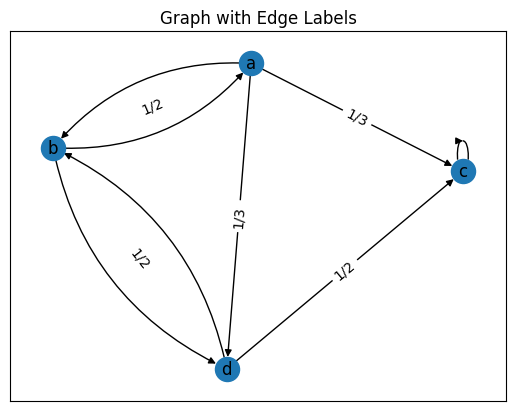

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()
edge_list = [
    ('a', 'b', {"w": "1/3"}),
    ('a', 'd', {"w": "1/3"}),
    ('a', 'c', {"w": "1/3"}),
    ('b', 'a', {"w": "1/2"}),
    ('b', 'd', {"w": "1/2"}),
    ('c', 'c', {"w": "1"}),
    ('d', 'b', {"w": "1/2"}),
    ('d', 'c', {"w": "1/2"})
    ]
# Transition matrix of above graph
#    a    b    c    d
# a  0    1/2  0    0
# b  1/3  0    0  1/2
# c  1/3  0    1  1/2
# d  1/3  1/2  0    0

G.add_edges_from(edge_list)
pos = nx.spring_layout(G, seed=5)
fig, ax = plt.subplots()
nx.draw_networkx_nodes(G, pos, ax=ax)
nx.draw_networkx_labels(G, pos, ax=ax)

curved_edges = [edge for edge in G.edges() if reversed(edge) in G.edges()]
straight_edges = list(set(G.edges()) - set(curved_edges))
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=straight_edges)
arc_rad = 0.25
nx.draw_networkx_edges(G, pos, ax=ax, edgelist=curved_edges, connectionstyle=f"arc3, rad = {arc_rad}")

# Add labels to the edges
edge_labels = nx.get_edge_attributes(G, "w")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Graph with Edge Labels")
plt.show()


# Matlab code reference

In [ ]:
# https://www.mathworks.com/help/matlab/math/use-page-rank-algorithm-to-rank-websites.html

# s = {'a' 'a' 'a' 'b' 'b' 'c' 'd' 'd' 'd'};
# t = {'b' 'c' 'd' 'd' 'a' 'b' 'c' 'a' 'b'};
# G = digraph(s,t);
# labels = {'a/3' 'a/3' 'a/3' 'b/2' 'b/2' 'c' 'd/3' 'd/3' 'd/3'};
# p = plot(G,'Layout','layered','EdgeLabel',labels);
# highlight(p,[1 1 1],[2 3 4],'EdgeColor','g')
# highlight(p,[2 2],[1 4],'EdgeColor','r')
# highlight(p,3,2,'EdgeColor','m')
# title('PageRank Score Transfer Between Nodes')

# Experimenting with PageRank algorithm

In [7]:
pr=nx.pagerank(G,0.4) 
pr

{'a': 0.19396564627489712,
 'b': 0.2198277742617284,
 'd': 0.2198277742617284,
 'c': 0.3663788052016461}

In [ ]:

def pagerank_algorithm(graph, damping_factor=0.85, max_iterations=100, tolerance=1e-6):
    # Create a copy of the graph to avoid modifying the original graph
    G = graph.copy()
    
    # Initialize node values with equal probabilities
    initial_pagerank = 1 / len(G.nodes)
    pagerank_values = {node: initial_pagerank for node in G.nodes}
    
    for _ in range(max_iterations):
        new_pagerank_values = {}
        
        # Calculate new PageRank values for each node
        for node in G.nodes:
            sum_pr = sum(pagerank_values[neighbor] / len(list(G.neighbors(neighbor))) for neighbor in G.predecessors(node))
            new_pagerank = (1 - damping_factor) / len(G.nodes) + damping_factor * sum_pr
            new_pagerank_values[node] = new_pagerank
        
        # Check for convergence
        if all(abs(new_pagerank_values[node] - pagerank_values[node]) < tolerance for node in G.nodes):
            break
        
        pagerank_values = new_pagerank_values
    
    return pagerank_values

# Example usage
pagerank_values = pagerank_algorithm(G)
print("PageRank values:", pagerank_values)